In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"caglacaglayann","key":"c48acfcea0be0c7d0dfa2edf233e65d1"}'}

In [ ]:

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d "fedesoriano/stroke-prediction-dataset"


100% 67.4k/67.4k [00:00<00:00, 340kB/s]
100% 67.4k/67.4k [00:00<00:00, 340kB/s]


In [ ]:
!unzip -qq "stroke-prediction-dataset.zip"

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df_array = df.values
X = df.drop(["stroke","id","gender", "ever_married", "work_type", "Residence_type", "smoking_status"] ,axis=1)
y = df[["stroke"]]
categorical = ["age", "hypertension","heart_disease", "avg_glucose_level","bmi", "stroke"]
x = pd.get_dummies(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size = 0.25, random_state = 42) # this is for training the current dataset

In [ ]:
import math
for i in range(0,len(x)):
  try:
    for j in range(0,len(x.iloc[i])):
      if math.isnan(x.iloc[i][j]):
        print(f"NaN value found at index {i}, column {j}")
  except IndexError:
    raise Exception("Index out of range")


In [ ]:
mean_value = x['bmi'].mean() # bmi value averaged

In [ ]:
x['bmi'].fillna(value = mean_value, inplace = True)
x_train['bmi'].fillna(value = mean_value, inplace = True)
x_test['bmi'].fillna(value = mean_value, inplace = True) #average value printed instead of non-number values

In [ ]:
print(x['bmi']) # checked

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64


In [ ]:
import math
for i in range(0,len(X)):
  try:
    for j in range(0,len(X.iloc[i])):
      if math.isnan(X.iloc[i][j]):
      #if x[i][j] is None:
        print(f"NaN value found at index {i}, column {j}")
  except IndexError:
    raise Exception("Index out of range")

In [ ]:
df_model = GradientBoostingClassifier().fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
predicted_value = df_model.predict(x_test)

In [ ]:
accuracy_score(y_test,predicted_value)

0.9374021909233177

In [ ]:
cm = confusion_matrix(y_test, predicted_value)
print(cm)
cr = classification_report(y_test,predicted_value)
print(cr)

[[1198    0]
 [  80    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


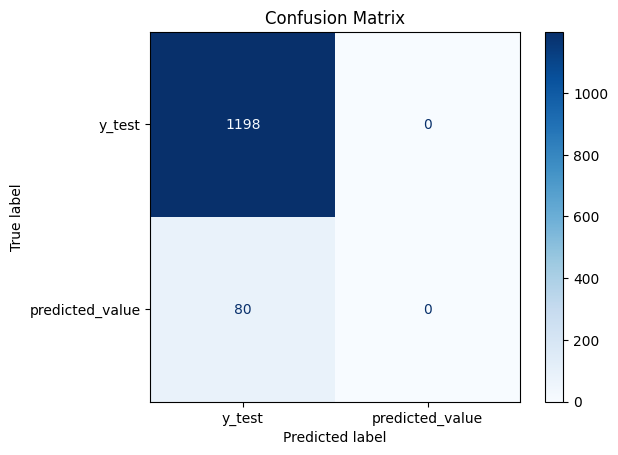

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
class_names = ["y_test", "predicted_value"]
titles = "Confusion Matrix"
confusion_mat = confusion_matrix(y_test, predicted_value, normalize ='true')
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)
display = display.plot(cmap = "Blues", values_format = '' )
display.ax_.set_title(titles)

plt.show()

In [ ]:
num1 = 0
num2 = 0
for row in range(0, len(df)):
  if df.iloc[row]['heart_disease']== 1:
    num1 += 1
  elif df.iloc[row]['heart_disease'] == 0:
    num2 += 1
  else:
    print("there is an error")

print("num1: ", num1)
print("num2: ", num2) # checking the number of heart disease

num1:  276
num2:  4834


In [ ]:
new_data = pd.DataFrame({#"gender":['Female','Male'],
            "age":['35','60'],
            "hypertension": ['1','0'],
            "heart_disease": ['0','1'],
            #"ever_married": ['No', 'Yes'],
            #"work_type":['Self-employed', 'Private'],
            #"Residence_type":['Urban','Rural'],
            "avg_glucose_level": ['228.4', '195.5'],
            "bmi": ['20', '30'],
            #"smoking_status":['smoked','never smoked']
            })


In [ ]:
y_pred = df_model.predict(new_data) # predicting new data

In [ ]:
print(y_pred) # result of new data

[0 0]
